In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Passo 1: Leitura dos dados
Leitura dos bancos de dados em DataFrame Pandas. 

In [102]:
caminho_dados_lazaro = 'Datasets/Lazaro/dados_lazaro.csv'

In [103]:
df = pd.read_csv(caminho_dados_lazaro)

In [104]:
df.head()

,Piquete,Altura real,Altura esperada,Animal,SensorID,Sensor Name,Date,X,Y,Z,Comportamento,Season
0,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:30,-0.012,-0.456,0.900,Indefinido,Indefinido
1,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:32,-0.008,-0.456,0.892,Indefinido,Indefinido
2,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:33,-0.010,-0.460,0.897,Indefinido,Indefinido
3,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:33,0.021,-0.386,0.963,Indefinido,Indefinido
4,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 08:25:34,0.012,-0.423,0.910,Indefinido,Indefinido


## Passo 2: Pré-processamento


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Função para calcular acuracia de cada etapa do Pré-processamento
def calc_acuracia(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Acurácia da etapa:")
    print(accuracy_score(y_test, preds)*100)

### 2.1 Lidando com dados faltantes

In [106]:
df[df.isnull().any(axis=1)]

,Piquete,Altura real,Altura esperada,Animal,SensorID,Sensor Name,Date,X,Y,Z,Comportamento,Season
296,11,25.2,25.0,90,434137,Accelerometer - 434137,2019-11-09 08:36:31,175786.0,NaN,NaN,Indefinido,Indefinido


In [107]:
df.isnull().sum()

Piquete            0
Altura real        0
Altura esperada    0
Animal             0
SensorID           0
Sensor Name        0
Date               0
X                  0
Y                  1
Z                  1
Comportamento      0
Season             0
dtype: int64

In [108]:
# No entanto, durante a integração dos dados valores nulos em "Comportamento" e "Season" foram nomeados "Indefinido", logo temos que tratá-los
df.Comportamento.value_counts()

Pastejando     342516
Ruminando      158228
Ocio           126141
Indefinido      23496
Outros          19472
Locomovendo     12567
Agua             3779
Outro            2303
Ócio             2064
Name: Comportamento, dtype: int64

In [109]:
df = df.replace('Indefinido', np.NaN)

In [110]:
# Como praticamente não há valores faltantes nas variáveis independentes e há obeservações com variáveis alvo nulas, o melhor é apenas eliminar linhas com valores nulos
df = df.dropna(axis=0)
df.isnull().sum()

Piquete            0
Altura real        0
Altura esperada    0
Animal             0
SensorID           0
Sensor Name        0
Date               0
X                  0
Y                  0
Z                  0
Comportamento      0
Season             0
dtype: int64

### 2.2 Tratamento de dados categóricos

#### Correção dos nomes das classificações

In [111]:
np.unique(df['Comportamento'])

array(['Agua', 'Locomovendo', 'Ocio', 'Outro', 'Outros', 'Pastejando',
       'Ruminando', 'Ócio'], dtype=object)

In [112]:
df = df.replace(to_replace=['Ócio','Outro'], value=['Ocio', 'Outros'])

In [113]:
np.unique(df['Season'])

array(['Spring', 'fall', 'spring', 'spring ', 'summer'], dtype=object)

In [114]:
df = df.replace(to_replace=['Spring','spring '], value=['spring', 'spring'])

In [115]:
# Devido a baixa quantidade de dados desses comportamentos em relação ao de mais, suas obseravações são deletadas

df = df.replace(['Agua', 'Locomovendo', 'Outros'], np.NaN)
df = df.dropna(axis=0)

In [116]:
df.Comportamento.value_counts()

Pastejando    342516
Ruminando     158228
Ocio          128205
Name: Comportamento, dtype: int64

#### Codificação - Usando One-Hot Encoding

In [117]:
from sklearn.preprocessing import OneHotEncoder

# Aplica one-hot encoder à coluna Season
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df['Season'].values.reshape(-1,1)))

In [118]:
# One-hot encoder remove os indices; recuperando-os
OH_cols.index = df.index

In [119]:
# Renomeia as colunas com suas respectivas definições
OH_cols.columns = OH_encoder.get_feature_names(['Season'])

In [120]:
# Remoção da coluna Season (será substituida com one-hot encoding)
num_df = df.drop('Season', axis=1)

In [121]:
# Adiciona colunas codificadas por one-hot a features numéricas
OH_df = pd.concat([num_df, OH_cols], axis=1)

In [122]:
# Como one-hot encoder foi melhor, usaremos ele
df = OH_df

In [123]:
OH_df

,Piquete,Altura real,Altura esperada,Animal,SensorID,Sensor Name,Date,X,Y,Z,Comportamento,Season_fall,Season_spring,Season_summer
2846,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:47,-0.132,-0.583,0.712,Ocio,0.0,1.0,0.0
2847,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:48,0.021,-0.792,0.574,Ocio,0.0,1.0,0.0
2848,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:50,0.021,-0.792,0.574,Ocio,0.0,1.0,0.0
2849,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:51,0.021,-0.792,0.574,Ocio,0.0,1.0,0.0
2850,11,25.2,25.0,85,434138,Accelerometer - 434138,2019-11-09 09:47:52,-0.061,-0.870,0.478,Ocio,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690561,1,10.3,10.0,81,434137,Accelerometer - 434137,2020-06-30 17:43:27,-0.729,0.026,0.660,Pastejando,1.0,0.0,0.0
690562,1,10.3,10.0,81,434137,Accelerometer - 434137,2020-06-30 17:43:28,-0.614,0.271,0.577,Pastejando,1.0,0.0,0.0
690563,1,10.3,10.0,81,434137,Accelerometer - 434137,2020-06-30 17:43:29,-0.734,0.227,0.571,Pastejando,1.0,0.0,0.0
690564,1,10.3,10.0,81,434137,Accelerometer - 434137,2020-06-30 17:43:30,-0.587,-0.149,0.704,Pastejando,1.0,0.0,0.0


### 2.3 Tratamento de outliers

#### Estatística básica dos dados

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline

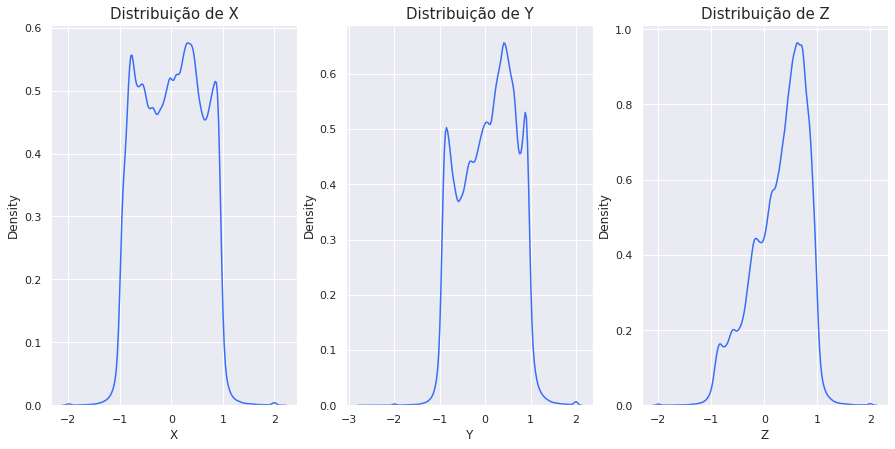

In [79]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("Distribuição de X", fontsize=15)
sns.kdeplot(data = df["X"])
plt.subplot(1,3,2)
plt.title("Distribuição de Y", fontsize=15)
sns.kdeplot(data = df["Y"])
plt.subplot(1,3,3)
plt.title("Distribuição de Z", fontsize=15)
sns.kdeplot(data = df["Z"])
plt.show()

#### Usando especificações do sensor

In [80]:
df.describe()

,Piquete,Altura real,Altura esperada,Animal,SensorID,X,Y,Z,Season_fall,Season_spring,Season_summer
count,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000,628949.000000
mean,7.668875,18.993407,19.145784,75.535546,432876.812495,0.003104,0.071496,0.301034,0.398161,0.240705,0.361134
std,3.777652,5.947000,6.288472,26.852944,18001.109180,0.576456,0.582189,0.494047,0.489519,0.427512,0.480330
min,1.000000,10.000000,10.000000,21.000000,175810.000000,-1.999000,-2.688000,-1.999000,0.000000,0.000000,0.000000
25%,4.000000,11.230000,11.560000,81.000000,434136.000000,-0.498000,-0.402000,-0.021000,0.000000,0.000000,0.000000
50%,9.000000,20.600000,20.000000,84.000000,434137.000000,0.020000,0.127000,0.407000,0.000000,0.000000,0.000000
75%,11.000000,24.620000,25.000000,93.000000,434139.000000,0.475000,0.540000,0.683000,1.000000,0.000000,1.000000
max,12.000000,26.200000,25.000000,105.000000,434139.000000,2.106000,2.000000,2.020000,1.000000,1.000000,1.000000


In [124]:
# Range mínimo e máximo do aceleromêtro
min = float(-1.999)
max = float(1.999)

In [125]:
df.loc[df.X > max, 'X'] = max
df.loc[df.Y > max, 'Y'] = max
df.loc[df.Z > max, 'Z'] = max

df.loc[df.X < min, 'X'] = min
df.loc[df.Y < min, 'Y'] = min
df.loc[df.Z < min, 'Z'] = min

### 2.4 Transformação

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
calc_acuracia(X_train, X_test, y_train, y_test)

### 2.5 Criação de novas features

In [ ]:
# Magnitude
a = df[['X', 'Y', 'Z']].pow(2)

In [ ]:
b = a.sum(axis=1)

In [ ]:
magn = b.pow(1/2)
magn = magn.rename('magn')

In [ ]:
df = pd.concat([df, magn], axis=1)

In [ ]:
df

### 2.6 Gravação do conjunto de dados após o pré-processamento

In [126]:
# Geração de um zip com os dados em csv 
compression_opts = dict(method='zip', archive_name='dados_pre_processados_lazaro.csv') 

df.to_csv('dados_pre_processados_lazaro_final.zip', index=False, compression=compression_opts)